## Chapter 4
# Physical Basis of Sound

Text(0.5,0.98,'Constant acceleration')

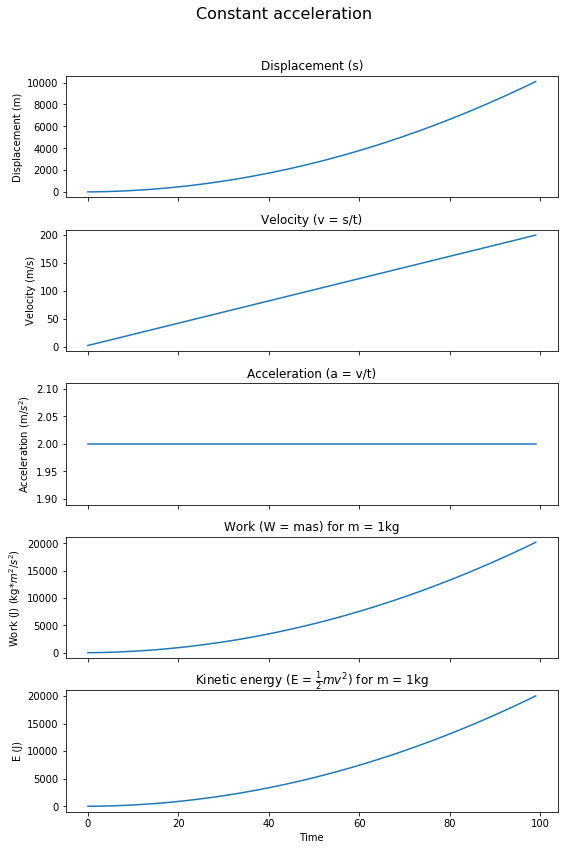

In [1]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

def plot_acceleration(accelerations):
    velocities = accelerations.cumsum()
    displacements = velocities.cumsum()

    fig, axes = plt.subplots(5, 1, figsize=(8, 12), sharex='all')
    axes[0].plot(displacements)
    axes[0].set_title('Displacement (s)')
    axes[0].set_ylabel('Displacement (m)')

    axes[1].plot(velocities)
    axes[1].set_title('Velocity (v = s/t)')
    axes[1].set_ylabel('Velocity (m/s)')

    axes[2].plot(accelerations)
    axes[2].set_title('Acceleration (a = v/t)')
    axes[2].set_ylabel('Acceleration (m/$s^2$)')
    
    axes[3].plot(accelerations * displacements)
    axes[3].set_title('Work (W = mas) for m = 1kg')
    axes[3].set_ylabel('Work (J) (kg*$m^2$/$s^2$)')

    axes[4].plot((velocities ** 2) / 2)
    axes[4].set_title('Kinetic energy (E = $\\frac{1}{2}mv^2$) for m = 1kg')
    axes[4].set_xlabel('Time')
    axes[4].set_ylabel('E (J)')
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)
    return fig

constant_acceleration = 2
fig = plot_acceleration(np.full(100, constant_acceleration))
fig.suptitle('Constant acceleration', size=16)

Text(0.5,0.98,'Decreasing acceleration')

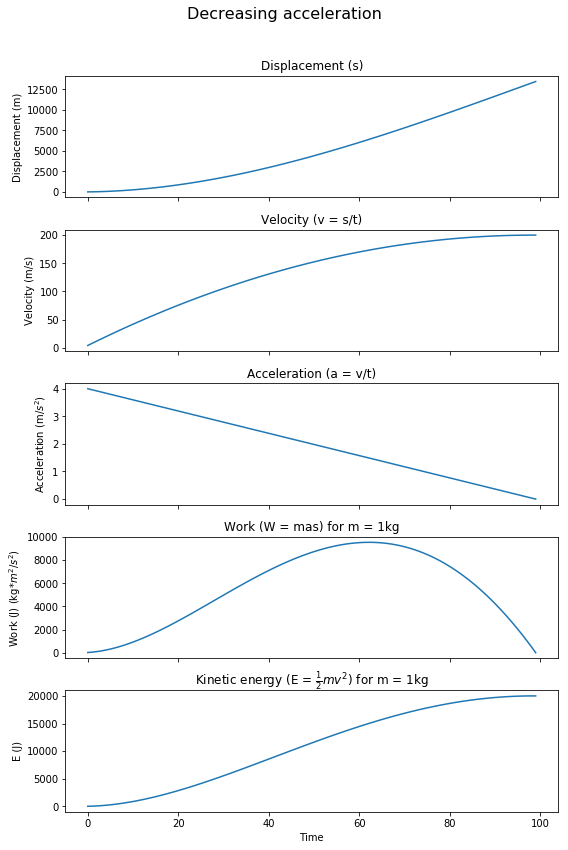

In [2]:
fig = plot_acceleration(np.linspace(4, 0, 100))
fig.suptitle('Decreasing acceleration', size=16)

Text(0.5,0.98,'Increasing acceleration')

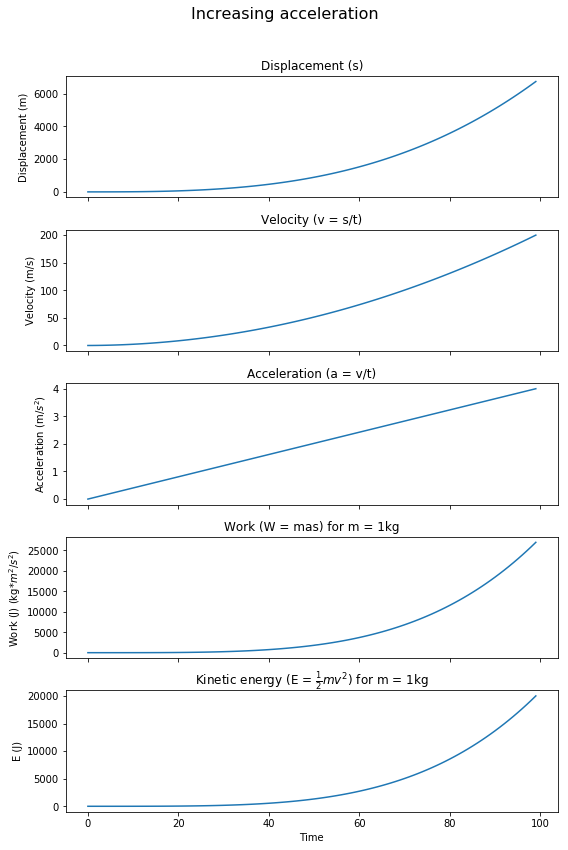

In [3]:
fig = plot_acceleration(np.linspace(0, 4, 100))
fig.suptitle('Increasing acceleration', size=16)

Text(0.5,0.98,'Increasing acceleration crossing zero')

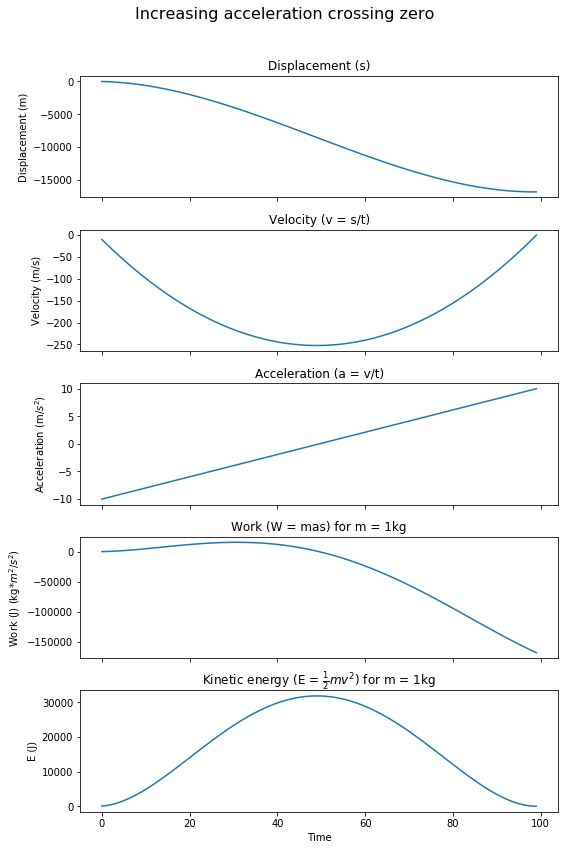

In [4]:
fig = plot_acceleration(np.linspace(-10.0, 10.0, 100))
fig.suptitle('Increasing acceleration crossing zero', size=16)

Text(0.5,0.98,'Decreasing acceleration crossing zero')

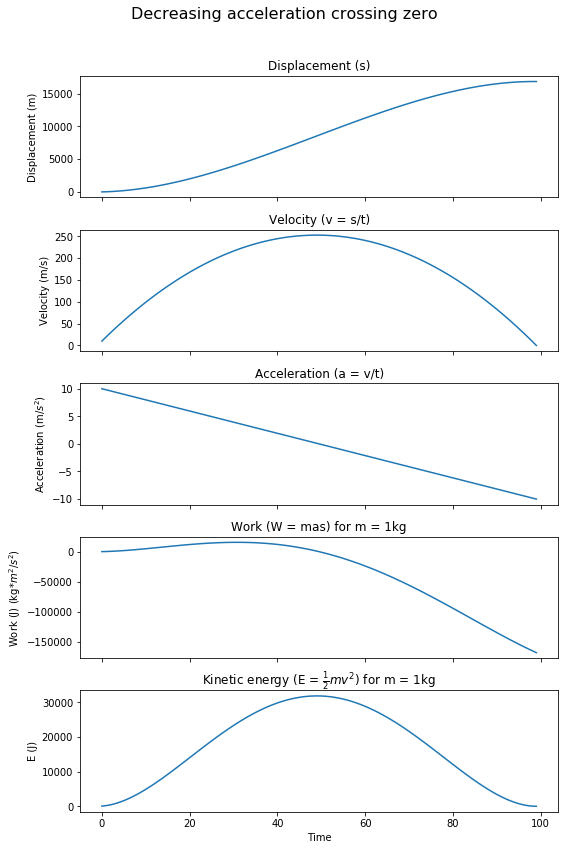

In [5]:
fig = plot_acceleration(np.linspace(10.0, -10.0, 100))
fig.suptitle('Decreasing acceleration crossing zero', size=16)

Text(0.5,0.98,'Parabolic acceleration')

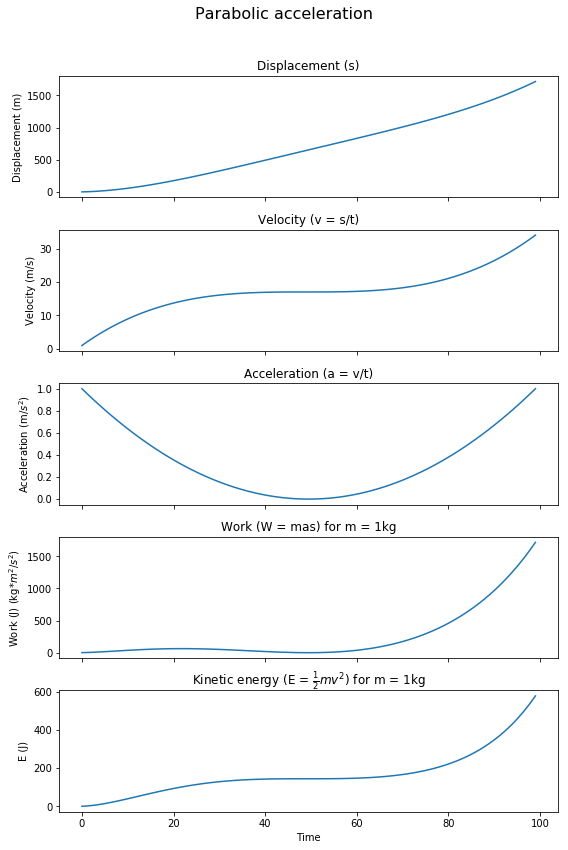

In [6]:
fig = plot_acceleration(np.linspace(-1.0, 1.0, 100) ** 2)
fig.suptitle('Parabolic acceleration', size=16)

In [12]:
from matplotlib import animation
from IPython.display import HTML

num_atoms = 2400
tube_length = 100
tube_width = 20
wave_length = tube_length / 5
wave_constant = 2 * np.pi / wave_length
amplitude = 0.10 * wave_length
angular_frequency = 4 * np.pi

atom_coordinates = np.random.rand(num_atoms, 2) * (tube_length, tube_width)
atom_coordinates = atom_coordinates[atom_coordinates[:,0].argsort()]

fig, axes = plt.subplots(5, 1, figsize=(12, 20))

fig.suptitle('Longitudinal Waves', size=16)
axes[0].set_title('Particle displacements')
axes[0].set_xlabel('Displacement x (m)')
axes[0].set_ylabel('Displacement y (m)')
axes[0].set_xlim([0, tube_length])
axes[0].set_ylim([0, tube_width])

# highlight a few points
highlight_points = np.random.randint(0, num_atoms, 5)
colors = np.full(num_atoms, 'black')
sizes = np.full(num_atoms, 3)
colors[highlight_points] = 'r'
sizes[highlight_points] = 30

scatter = axes[0].scatter(atom_coordinates[:,0], atom_coordinates[:,1], s=sizes, c=colors)

num_frames = 60

total_pressure_values = np.zeros(num_frames)

import matplotlib.cm as cm

xs = atom_coordinates[:,0]
old_coords = atom_coordinates.copy()
new_coords = atom_coordinates.copy()
diffs = np.zeros(old_coords.shape)

def animate(i):
    old_coords[:,0] = np.array([xs + amplitude * np.sin(wave_constant * xs - angular_frequency * i/num_frames)]) if i == 0 else new_coords[:,0]
    new_coords[:,0] = np.array([xs + amplitude * np.sin(wave_constant * xs - angular_frequency * (i+1)/num_frames)])
    diffs[:] = new_coords - old_coords

    crossing_indices = np.where((new_coords[:,0] >= tube_length / 2 - 4) & (new_coords[:,0] <= tube_length / 2 + 4))
    
    crossing_diffs = diffs[crossing_indices]
    crossing_diff_magnitudes = np.linalg.norm(crossing_diffs, axis=1)
    total_pressure_values[i] = crossing_diffs[:,0].sum()

    scatter.set_offsets(new_coords)

    axes[1].cla()
    axes[1].hist(new_coords[:,0], bins=200)
    axes[1].set_title('Density')
    axes[1].set_xlabel('Displacement x (m)')
    axes[1].set_ylabel('Linear Density ($m^{-1}$)')
    axes[1].set_xlim([0, tube_length])
    axes[1].set_ylim([0, 50])

    colors = np.arctan2(diffs[:, 0], diffs[:, 1]) * np.linalg.norm(diffs, axis=1)
    colors /= colors.max()
    axes[2].cla()
    axes[2].quiver(new_coords[:, 0], new_coords[:, 1], diffs[:, 0], diffs[:, 1], color=cm.coolwarm(colors), pivot='mid')
    axes[2].axvline(x=tube_length / 2, linewidth=4, color='g', label='Measurement area')
    axes[2].set_title('Particle displacements with velocity')
    axes[2].set_xlabel('Displacement x (m)')
    axes[2].set_ylabel('Displacement y (m)')
    axes[2].set_xlim([0, tube_length])

    axes[3].cla()
    axes[3].plot(new_coords[:,0], diffs[:,0])
    axes[3].set_title('Total velocity at displacement')
    axes[3].set_xlabel('Displacement x (m)')
    axes[3].set_ylabel('Displacement y (m)')
    axes[3].set_xlim([0, tube_length])

    axes[4].cla()
    axes[4].plot(total_pressure_values[1:i])
    axes[4].set_title('Approx. pressure on green line above')
    axes[4].set_xlabel('Time')
    axes[4].set_ylabel('Sound Pressure Level (SPL)')
    axes[4].set_xlim([0, num_frames - 1])

    fig.tight_layout()
    fig.subplots_adjust(top=0.9)

anim = animation.FuncAnimation(fig, animate, frames=num_frames, interval=42)
plt.close()
HTML(anim.to_html5_video())

In [10]:
num_atoms = 4800

cyl_radius = 20
wave_length = 0.4 * cyl_radius
wave_constant = 2 * np.pi / wave_length
amplitude = 0.10 * wave_length

def cartesian_to_polar(a):
    return np.array([np.arctan2(a[:,0], a[:,1]), np.linalg.norm(a, axis=1)]).T

def polar_to_cartesian(a):
    return np.array([a[:,1] * np.cos(a[:,0]), a[:,1] * np.sin(a[:,0])]).T

atom_coordinates = np.random.rand(num_atoms, 2) * 2 * cyl_radius - cyl_radius

fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle('Longitudinal Waves', size=16)
ax1.set_xlabel('Displacement x (m)')
ax1.set_ylabel('Displacement y (m)')
ax1.set_xlim([-cyl_radius, cyl_radius])
ax1.set_ylim([-cyl_radius, cyl_radius])

# highlight a few points
colors = np.full(num_atoms, 'black')
sizes = np.full(num_atoms, 3)
colors[-5:] = 'r'
sizes[-5:] = 30

scatter = ax1.scatter(atom_coordinates[:,0], atom_coordinates[:,1], s=sizes, c=colors)
num_frames = 60

def animate(i):
    phi_and_r_coords = cartesian_to_polar(atom_coordinates)
    scatter.set_offsets(polar_to_cartesian(np.array([phi_and_r_coords[:, 0], np.maximum(0, phi_and_r_coords[:,1] + amplitude * np.sin(wave_constant * phi_and_r_coords[:,1] - angular_frequency * i/num_frames))]).T))

anim = animation.FuncAnimation(fig, animate, frames=num_frames, interval=42)
plt.close()
HTML(anim.to_html5_video())